In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
import ClassCOMPAS     as CC ###

# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 
# import the formation channel scripts
from ClassFormationChannels_5mainchannels import * 
# import the comsic integration (SFRD) scripts
import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data 



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


### the following block of code just creates list for the SFRD model names as they occur in the csv files 

In [2]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
            
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD)
        print(MSSFRnameslist[ind_SFRD])
        
        
        


0 .0.0.0
000
16 .2.3.1
231
20 .3.1.2
312


In [3]:
def calculateMaxVariations(whichRate='intrinsic', DCO_ind=0, BPSnameslist=BPSnameslist, whichGraph='FormationChannels', whichChannel='classic'):

    
    
    minMaxMSSFRrates = []
    minMaxBPSrates = []
    meanScatterMSSFRrates = []
    meanScatterBPSrates = []
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]


    
    
    
#     nrDATAready = 11
#     nModels=11
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    existingBPSnameslist_ind = np.arange(len(BPSnameslist))
    print(existingBPSnameslist_ind)
    
    
    
    minMaxMSSFR     = np.zeros((2,len(MSSFRnameslist)))
    percentileMSSFR = np.zeros((3,len(MSSFRnameslist)))
    minMaxBPS       = np.zeros((2,len(existingBPSnameslist_ind)))
    percentileBPS   = np.zeros((3,len(existingBPSnameslist_ind)))
    
    
    List_formationchannelOptions = ['All', 'classic', \
                      'stable B no CEE', \
                    'immediate CE',\
                 r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
        
    
    headernames = ['All', 'channel I', 'channel II', 'channel III', 'channel IV', 'channel V']

        
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        # open right file. 
        if whichGraph=='general':
            stringgg =  'AllDCOsimulation'
            
        elif whichGraph=='FormationChannels':
            stringgg = 'AllDCOsimulation_formation_channels'
            
            
            
        df_name = '/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles/rates_MSSFR_Models_' + TypesLabels[DCO_ind] + '_' + stringgg +  '.csv' 
        df = pd.read_csv(df_name, index_col=0).T
        rates_L = df[MSSFRnameslistCSV[ind_L]]
#         print(df)

        if whichRate =='intrinsic':
            if whichGraph=='general':
                rates = np.asarray(rates_L[::2])
            elif whichGraph=='FormationChannels':
                ind_wanted = dictFormationChannelIndex[whichChannel]*2
                rates = np.asarray(rates_L[ind_wanted::12][0:nModels])
                totalrates = np.asarray(rates_L[0::12][0:nModels])
                rates = rates/totalrates # fractional rate
                

        elif whichRate=='observed':
            if whichGraph=='general':
                rates = np.asarray(rates_L[1::2])
            elif whichGraph=='FormationChannels':
                ind_wanted = (dictFormationChannelIndex[whichChannel]*2)+1
                rates = np.asarray(rates_L[ind_wanted::12][0:nModels])
                totalrates = np.asarray(rates_L[1::12][0:nModels])
                rates = rates/totalrates # fractional rate


            ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'

        # over different models
        
        rates = np.asarray(rates)[existingBPSnameslist_ind]
        

        
        minMaxMSSFR[:,ind_L] = np.asarray([np.min(rates), np.max(rates)])
        percentileMSSFR[:,ind_L] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])

  
        for ind, modelname in enumerate(np.asarray(BPSnameslist)[existingBPSnameslist_ind]):
            ind_m = existingBPSnameslist_ind[ind]
            
            # open right file. 
            if whichGraph=='general':
                stringgg =  'AllDCOsimulation'

            elif whichGraph=='FormationChannels':
                stringgg = 'AllDCOsimulation_formation_channels'
                
            df_name = '/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles/rates_MSSFR_Models_' + TypesLabels[DCO_ind]  + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0)

            if whichRate =='intrinsic':
                # open right headername. 
                if whichGraph=='general':
                    namez0 = modelname + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]'
                    rates = np.asarray(df[namez0])
                 

                elif whichGraph=='FormationChannels':
                    ind_channel = dictFormationChannelIndex[whichChannel]
                    namez0 = modelname + headernames[ind_channel] + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]'
                    rates = np.asarray(df[namez0])
                    namez0All = modelname + headernames[0] + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]'
                    ratesAll = np.asarray(df[namez0All])
                    rates = rates/ratesAll
                
                

#                     if ind_L==0:
#                         print('the intrinsic fiducial rate =',rates[0])            

            elif whichRate=='observed':
                if whichGraph=='general':
                    nameObs = modelname + ' observed (design LVK) [yr^{-1}]'
                    rates =np.asarray( df[nameObs])
            
                elif whichGraph=='FormationChannels':
                    ind_channel = dictFormationChannelIndex[whichChannel]
                    nameObs = modelname + headernames[ind_channel] + ' observed (design LVK) [yr^{-1}]'
                    rates =np.asarray( df[nameObs])
                    nameObsAll = modelname + headernames[0] + ' observed (design LVK) [yr^{-1}]'
                    ratesAll = np.asarray(df[nameObsAll])
                    rates = rates/ratesAll
            
            
                
                

#                     if ind_L==0:
#                         print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'

            minMaxBPS[:,ind] = np.asarray([np.min(rates), np.max(rates)])
            percentileBPS[:,ind] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])


    return minMaxMSSFR, percentileMSSFR, minMaxBPS, percentileBPS




In [4]:
def plotRatesMSSFRandModelsAnalysisBHNSColors(whichRate='intrinsic'):
    ncols=1
    nrows=1
    # 20, 12
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,6), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
#     nrDATAready = 12
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    
    for ind_t, DCOtype in enumerate(Types):
        if DCOtype=='BHNS':
        
            for ind_L, MSSFRname in enumerate(MSSFRnameslist):

                stringgg = 'AllDCOsimulation'
                df_name = '/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
                df = pd.read_csv(df_name, index_col=0).T
                rates_L = df[MSSFRnameslistCSV[ind_L]]


                if whichRate =='intrinsic':
                    rates = rates_L[::2][0:nModels]
    #                     print(rates)
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'







                elif whichRate=='observed':
                    rates = rates_L[1::2][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'




                if MSSFRname=='000':
                    COLOR= TypeColours[ind_t]#  'crimson'
                    zorder = 100
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[0]
                    ALPHA=1
                elif MSSFRname=='231':
                    COLOR=TypeColours[ind_t]#'teal'
                    zorder=10
                    label=MSSFRnameslist[ind_L] 
                    ls = MSSFRlinestyles[1]
#                     print('label=', label)
                    ALPHA=1
                elif MSSFRname=='312':
                    COLOR=TypeColours[ind_t]#'c'
                    zorder=10
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[2]
#                     print('label=', label)
                    ALPHA=1
                else:
                    COLOR=TypeColours[ind_t]# 'lightgray' #MSSFRcolors[ind_L]
                    zorder=2
                    label=None    
                    ls = MSSFRlinestyles[0]
                    ALPHA=0.1

                axe.plot(range(len(rates)), rates, c='k', lw=3, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                axe.scatter(range(len(rates)), rates, c=BPScolors, s=120, label=label, zorder=zorder+1, alpha=ALPHA, linestyle=ls)
                # plot fiducial result with a star
                if ind_L==0:
                    axe.scatter(range(len(rates))[0], rates[0],\
                                       c=BPScolors[0], s=400, label=label, \
                                       zorder=1000, marker='*', edgecolor='black')


            # calculate statistics: 
            minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist,whichGraph='general')

            print('mean scatter per MSSFR:')
            print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
            meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

            print('mean scatter per BPS:')
    #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
            print(minMaxPerBPS[0])
            print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
            meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
    #         x = nrDATAready 
            textt_MSSFR = r'$\langle \sigma_{\rm{xyz}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
            textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
            minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])
            
            
        
            textt_min = roundAndFormat(minn)
            textt_max = roundAndFormat(maxx)
            
            if whichRate=='intrinsic':
                textt_min = r'$\mathcal{R}^0_{\rm{m,min}} = %s $'%textt_min
                textt_max = r'$\mathcal{R}^0_{\rm{m,max}} = %s $'%textt_max
            elif whichRate=='observed':
                textt_min = r'$\mathcal{R}_{\rm{det,min}} = %s $'%textt_min
                textt_max = r'$\mathcal{R}_{\rm{det,max}} = %s $'%textt_max
                
            axe.text(0.905, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
            axe.text(0.905, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')

            
            ## MAKE RANGE ERROR LINE: 
            resN = 20
            scatterline_x = -0.25 * np.ones(resN)
            scatterline_y = np.linspace(minn,maxx, resN)
            axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
            textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
            yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
            axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')


            axe.text(-0.6, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
            axe.text(-0.6, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')



            xmin = -0.8
            xmax = nModels -0.5 # change to len(df.T)
            xx = np.linspace(xmin,xmax,15)

            if whichRate=='intrinsic':
                min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
                max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
                axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color='gray', zorder=0)

                # for BHNS plot that its a upper limit
                if ind_t==1:
                    axe.scatter(xx, max_obs_rate, marker=11, color='gray', zorder=0, s=45)

            else:
                for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                    axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
                axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )


    #         # make up axes
            if ind_t ==1:
                xlabel = r'\textbf{binary population synthesis model} $\mu$'
            else:
                xlabel=r'  $\_$ '

            axe.set_xlim(xmin, xmax)
            axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel)
            axe.set_yscale('log')

    
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )


            
            
    
            ##### SECOND AXIS ######
            ##### SECOND AXIS ######
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            print('fontsize', fs)
            ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30)#, orientation=30)    
            


    plt.tight_layout()
    plt.subplots_adjust(wspace=0.34, hspace=0.16)#2)
#     plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False)
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




# Plot figure 9 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


the intrinsic fiducial rate for  BHNS = 43.022776513041364
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
mean scatter per MSSFR:
28.772061195775308
mean scatter per BPS:
[ 29.23476145  12.63977014   7.61129093   3.95475871   6.05802782
   7.42243905  37.10287662  37.68297937  86.64660419  25.85434113
  32.32316149  29.77772727  86.48529551 164.8897941  132.5681579 ]
7.442662091284803
fontsize 24


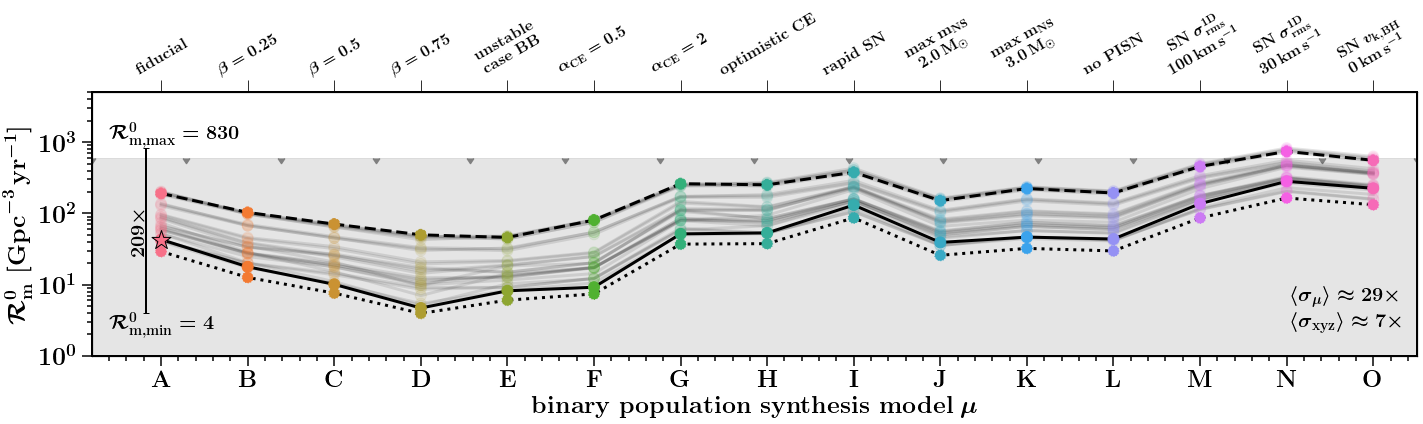

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


the observed fiducial rate for  BHNS = 10.827595525955116
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
mean scatter per MSSFR:
22.896332518411068
mean scatter per BPS:
[ 7.8188818   2.65335377  1.73365028  0.99656837  2.73740758  2.05566765
  8.25623419  9.44399058 15.47940372  5.70435851 10.13733303  7.96137187
 19.3690739  31.6454425  22.40835774]
8.350307303272379
fontsize 24


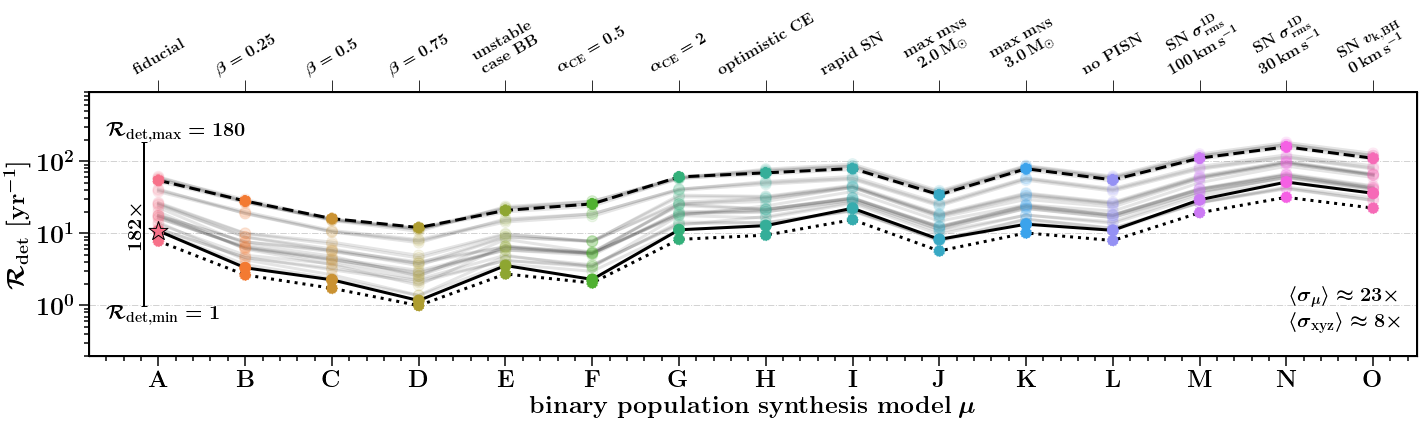

In [5]:
ylims =[[7,2000],[1,5000],[0.1,3000]]
plotRatesMSSFRandModelsAnalysisBHNSColors(whichRate='intrinsic')

ylims = [[30, 2E4], [0.2, 900], [0.0082, 70]]
plotRatesMSSFRandModelsAnalysisBHNSColors(whichRate='observed')